In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
# Instructor example 10.3
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'Inches')

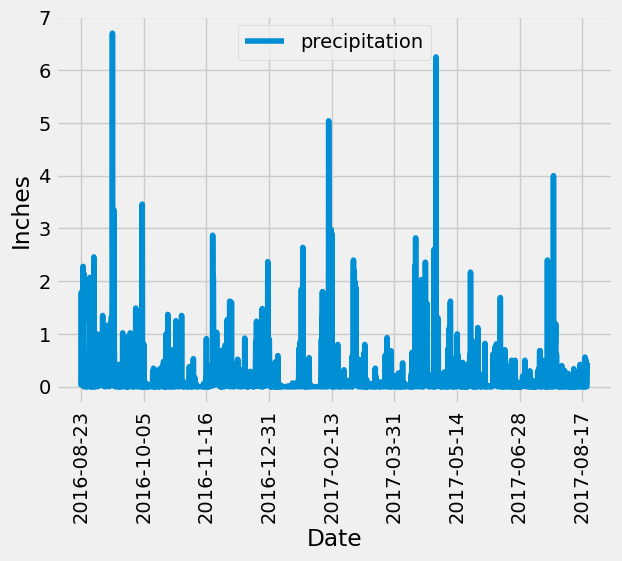

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

start_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.

end_date = start_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date,
       Measurement.prcp]

precip = session.query(*sel).\
    filter(Measurement.date >= end_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip, columns=["date", "precipitation"])

# Sort the dataframe by date

sorted_df = precip_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data


sorted_df.plot(x="date", y="precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [49]:
# Use Pandas to calculate the summary statistics for the precipitation data

precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset

session.query(Station.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

sel = [Measurement.station,
      func.count(Measurement.id)]

session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

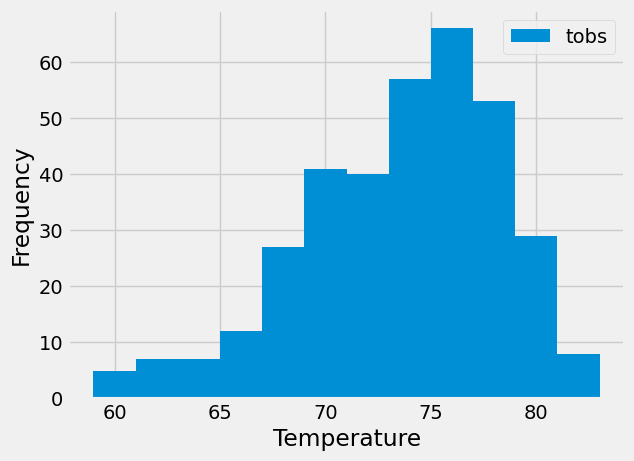

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

start_date = dt.date(2017, 8, 23)

end_date = start_date - dt.timedelta(days=365)

sel = [Measurement.date,
      Measurement.tobs]

most_active = session.query(*sel).\
        filter(Measurement.date >= end_date).\
        filter(Measurement.station == 'USC00519281').all()

most_active_df = pd.DataFrame(most_active)

# Used link below for histogram syntax
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

most_active_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [46]:
# Close Session
session.close()